In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.shape

(244, 7)

In [4]:
df.head()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,Total_bill,Tip,Sex,Smoker,Day,Time,Size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.columns

Index(['Total_bill', 'Tip', 'Sex', 'Smoker', 'Day', 'Time', 'Size'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Total_bill  244 non-null    float64
 1   Tip         244 non-null    float64
 2   Sex         244 non-null    object 
 3   Smoker      244 non-null    object 
 4   Day         244 non-null    object 
 5   Time        244 non-null    object 
 6   Size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
Tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
Size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [9]:
df.isnull().sum()

Total_bill    0
Tip           0
Sex           0
Smoker        0
Day           0
Time          0
Size          0
dtype: int64

In [5]:
df.groupby('day')['tip'].sum()

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [6]:
df.groupby(['day','sex'])['tip'].sum()

day   sex   
Thur  Male       89.41
      Female     82.42
Fri   Male       26.93
      Female     25.03
Sat   Male      181.95
      Female     78.45
Sun   Male      186.78
      Female     60.61
Name: tip, dtype: float64

In [12]:
Smoker = df['smoker'].value_counts()
Smoker

Smoker
No     151
Yes     93
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Smoker')

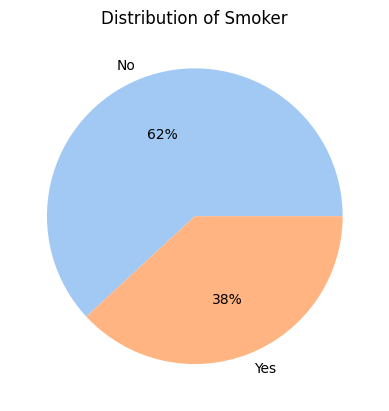

In [30]:
plt.pie(Smoker, labels=Smoker.index, autopct='%1.f%%', colors=sns.color_palette('pastel'))

plt.title('Distribution of Smoker')


In [ ]:
df['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
df['time'].value_counts()

Time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [ ]:
# Gender Analysis
gender_analysis = df.groupby('sex')[['sotal_bill', 'tip']].mean()
print('\nGender Analysis:\n', gender_analysis)


Gender Analysis:
         Total_bill       Tip
Sex                         
Female   18.056897  2.833448
Male     20.744076  3.089618


In [ ]:
# Day-wise Analysis
day_analysis = df.groupby('day')[['total_bill', 'tip']].mean()
print('\nDay-wise Analysis:\n', day_analysis)


Day-wise Analysis:
       Total_bill       Tip
Day                       
Fri    17.151579  2.734737
Sat    20.441379  2.993103
Sun    21.410000  3.255132
Thur   17.682742  2.771452


In [ ]:
# Size Impact
size_analysis = df.groupby('size')[['total_bill', 'tip']].mean()
print('\nSize Impact:\n', size_analysis)


Size Impact:
       Total_bill       Tip
Size                      
1       7.242500  1.437500
2      16.448013  2.582308
3      23.277632  3.393158
4      28.613514  4.135405
5      30.068000  4.028000
6      34.830000  5.225000


In [ ]:
# Smoking vs. Non-Smoking
smoking_analysis = df.groupby('smoker')[['total_bill', 'tip']].mean()
print('\nSmoking vs. Non-Smoking Analysis:\n', smoking_analysis)


Smoking vs. Non-Smoking Analysis:
         Total_bill       Tip
Smoker                      
No       19.188278  2.991854
Yes      20.756344  3.008710


In [ ]:
# Smoking vs. Non-Smoking
smoking_analysis = df.groupby('time')[['total_bill', 'tip']].mean()
print('\nSmoking vs. Non-Smoking Analysis:\n', smoking_analysis)


Smoking vs. Non-Smoking Analysis:
         Total_bill       Tip
Time                        
Dinner   20.797159  3.102670
Lunch    17.168676  2.728088


### 1.Bar Plot / Count Plot
- Displaying the distribution of categorical variables.
- Visualizing the frequency or count of each category in a dataset.

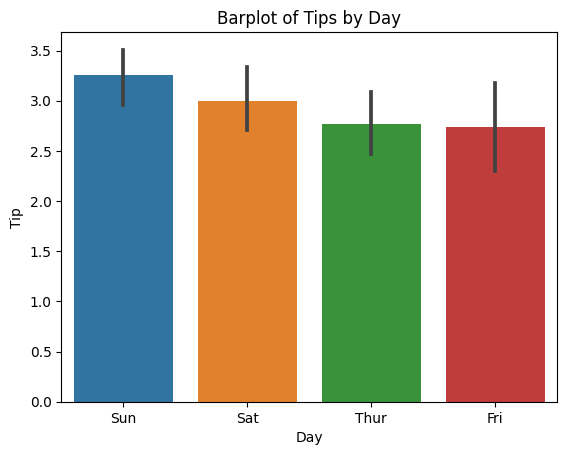

In [ ]:
sns.barplot(x=df['day'], y = df['tip'])
plt.title('Barplot of Tips by Day')
plt.show()

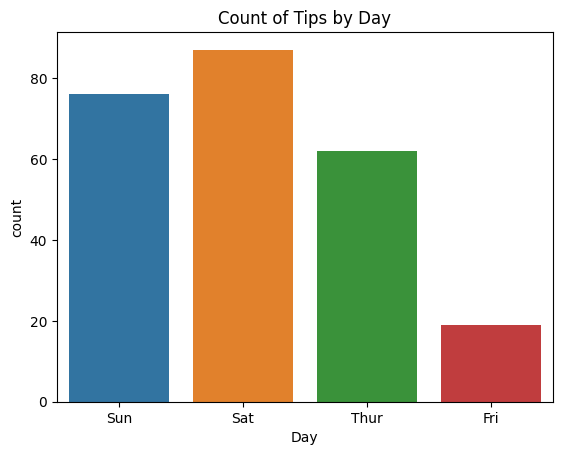

In [ ]:
sns.countplot(x='day', data=df)
plt.title('Count of Tips by Day')
plt.show()

### 2. Scatter Plot
- Exploring the relationship between two continuous variables.
- Identifying patterns, correlations, or clusters in the data.

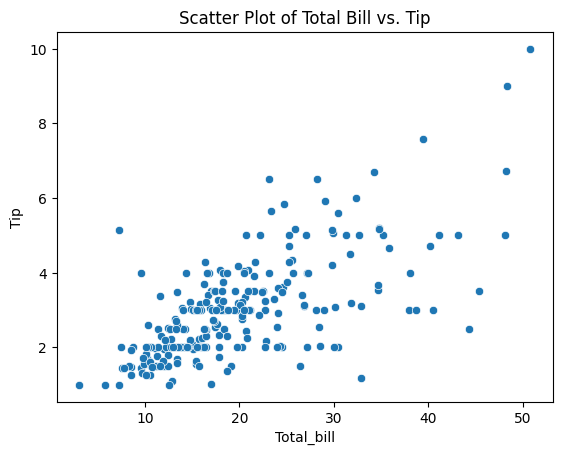

In [ ]:
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.show()

### 3. Line Plot
- Displaying the trend or pattern in a time series.
- Showing the relationship between two continuous variables over a continuous interval.
- Comparing changes in variables over a continuous range.

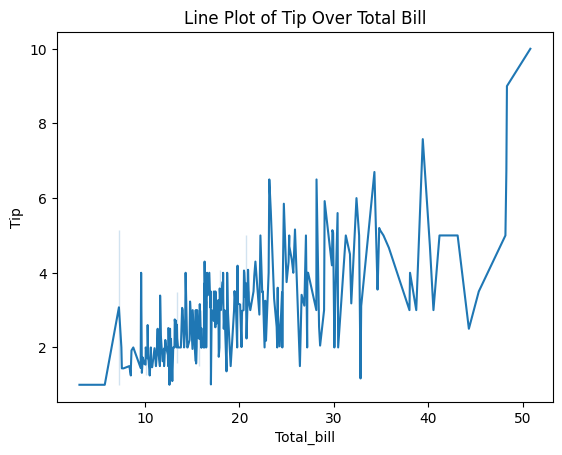

In [ ]:
sns.lineplot(x='total_bill', y='tip', data=df)
plt.title('Line Plot of Tip Over Total Bill')
plt.show()

### 4. Box Plot
- Displaying the mean, median, quantiles, and outliers in data.
- Comparing the distribution of multiple variables.
- Identifying the spread of numerical variables.
- Detecting potential outliers in the dataset.

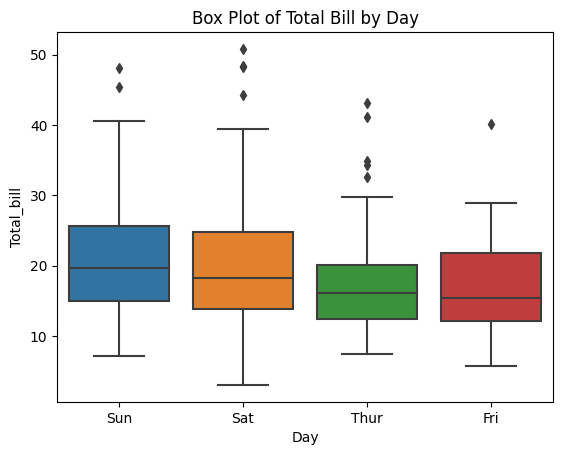

In [ ]:
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')
plt.show()

### 5. Density Plot 

we use density plots instead of histograms

- Visualizing the distribution of a continuous variable.
- Identifying peaks, valleys, and overall patterns in the data.
- Understanding the shape of the distribution.
- Comparing the distributions of multiple variables.

C:\Users\Admin\AppData\Local\Temp\ipykernel_6960\3026232118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total_bill'], shade=True)


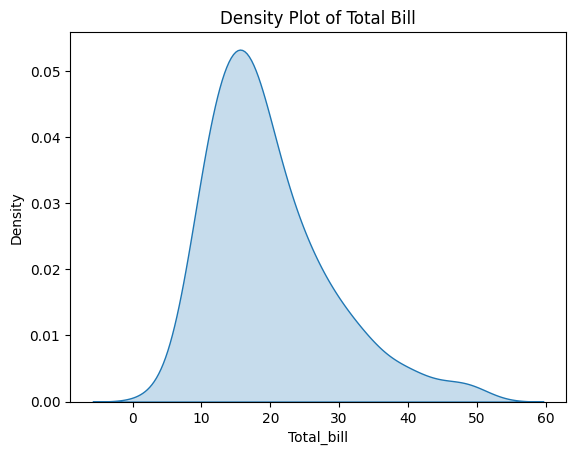

In [ ]:
sns.kdeplot(df['total_bill'], shade=True)
plt.title('Density Plot of Total Bill')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6960\2584875361.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




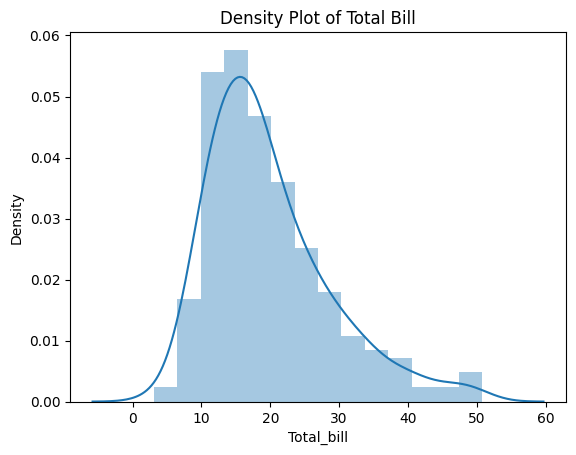

In [ ]:
sns.distplot(df['total_bill'])
plt.title('Density Plot of Total Bill')
plt.show()

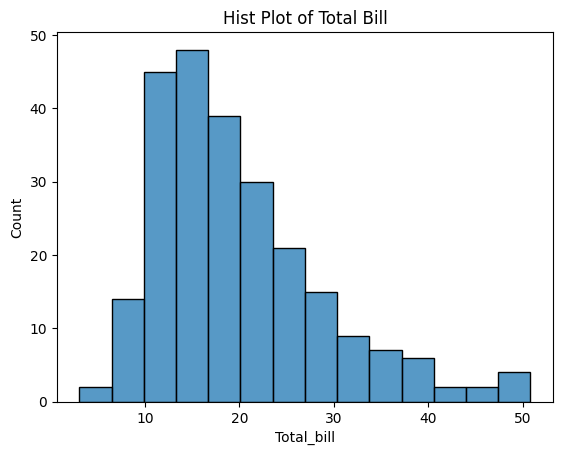

In [ ]:
sns.histplot(df['total_bill'])
plt.title('Hist Plot of Total Bill')
plt.show()

### 6. Pairplot
- Exploring correlations and trends between multiple variables by visualizing them in pairs.

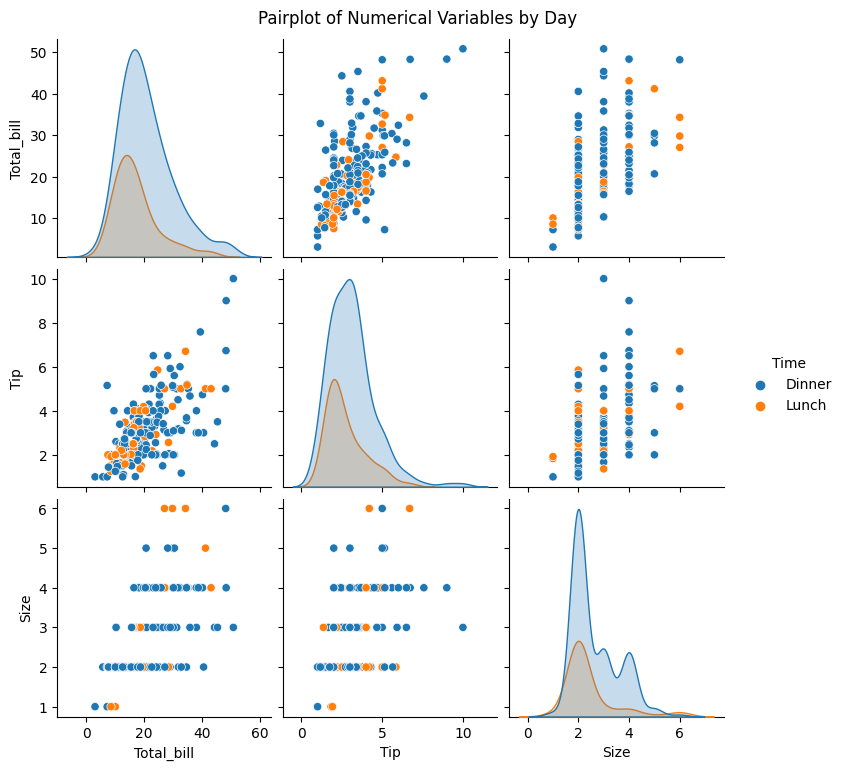

In [ ]:
#sns.pairplot(df , kind = "reg")
sns.pairplot(df, hue='time')
plt.suptitle('Pairplot of Numerical Variables by Day', y=1.02)
plt.show()

### 7. Heatmap
- Displaying the correlation matrix of numerical variables.
- Identifying patterns and relationships in a large dataset.


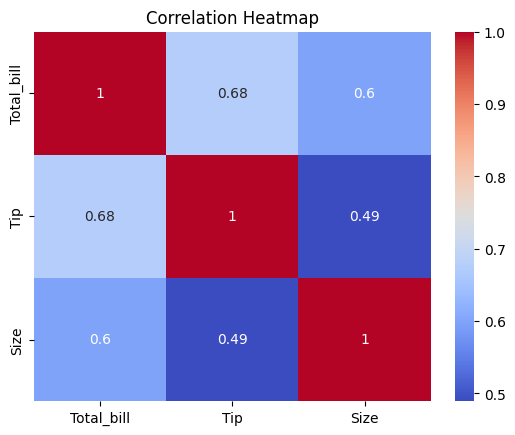

In [ ]:
correlation_matrix = df[['total_bill','tip','size']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 8. Combining Plots
- Well, we sort of do that a lot when it comes to EDA by employing plots that are actually just a combination of the plots discussed above.

- We do this in an attempt to ‘save time’ but let’s be real, decent EDA takes a lot of time regardless.

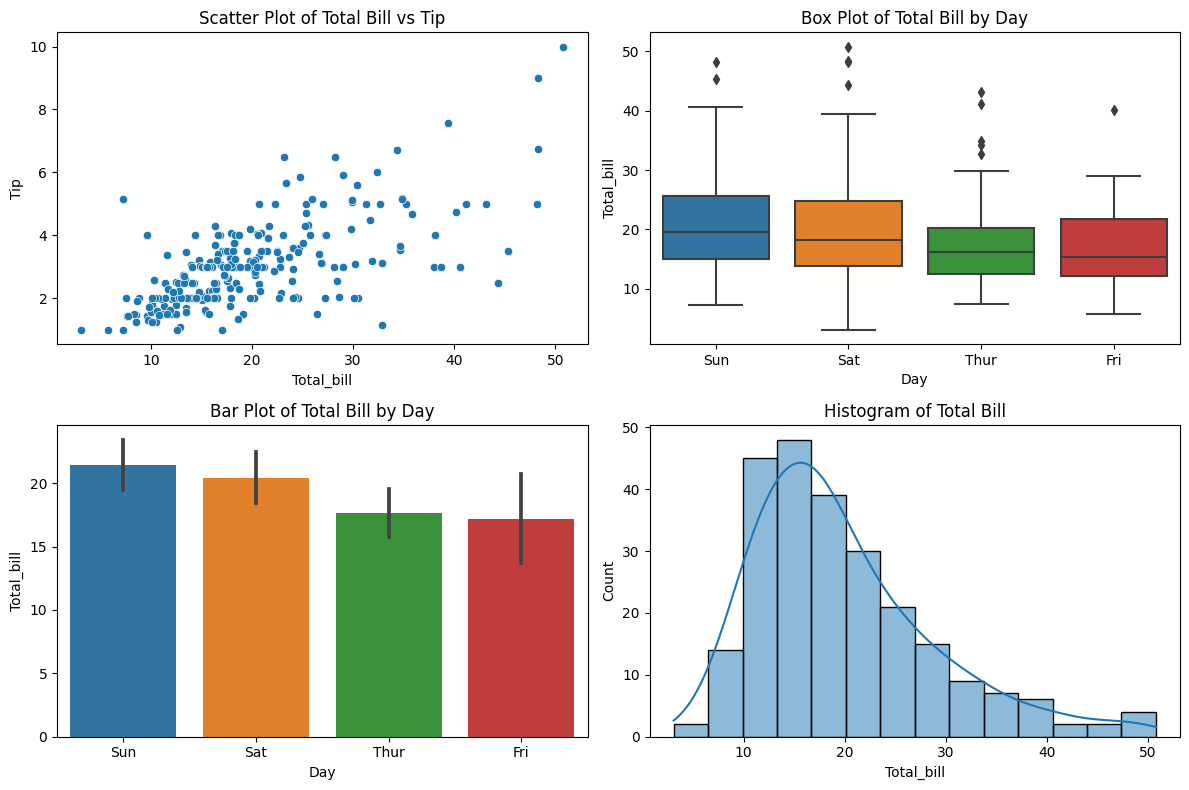

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')

plt.subplot(2, 2, 3)
sns.barplot(x='day', y='total_bill', data=df)
plt.title('Bar Plot of Total Bill by Day')

plt.subplot(2, 2, 4)
sns.histplot(df['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.tight_layout()
plt.show()

### 9. Violin Plot
- Combines the features of box plots and kernel density plots.
- Visualizing the distribution of a numerical variable across different categories.

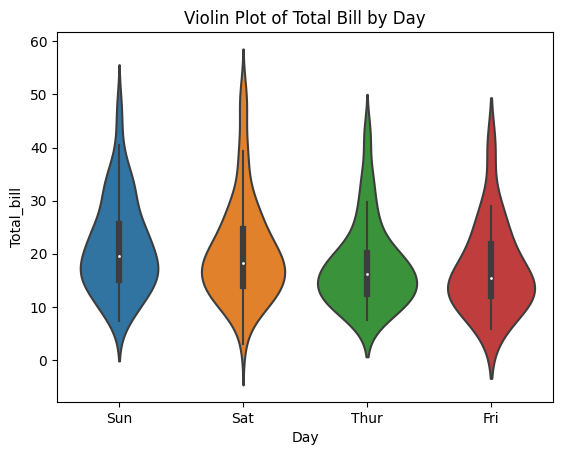

In [ ]:
sns.violinplot(x='day', y='total_bill', data=df)
plt.title('Violin Plot of Total Bill by Day')
plt.show()